# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [2]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregando a base de dados e visualizando algumas informações
df = pd.read_csv("previsao_de_renda.csv")
df = df.drop('Unnamed: 0', axis=1)
df.head(4)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69


In [4]:
# verificando quais colunas são de valores quantitativos
df_numerico = df.select_dtypes(include=['number'])
df_numerico = df_numerico.drop('index', axis=1)
df_numerico

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


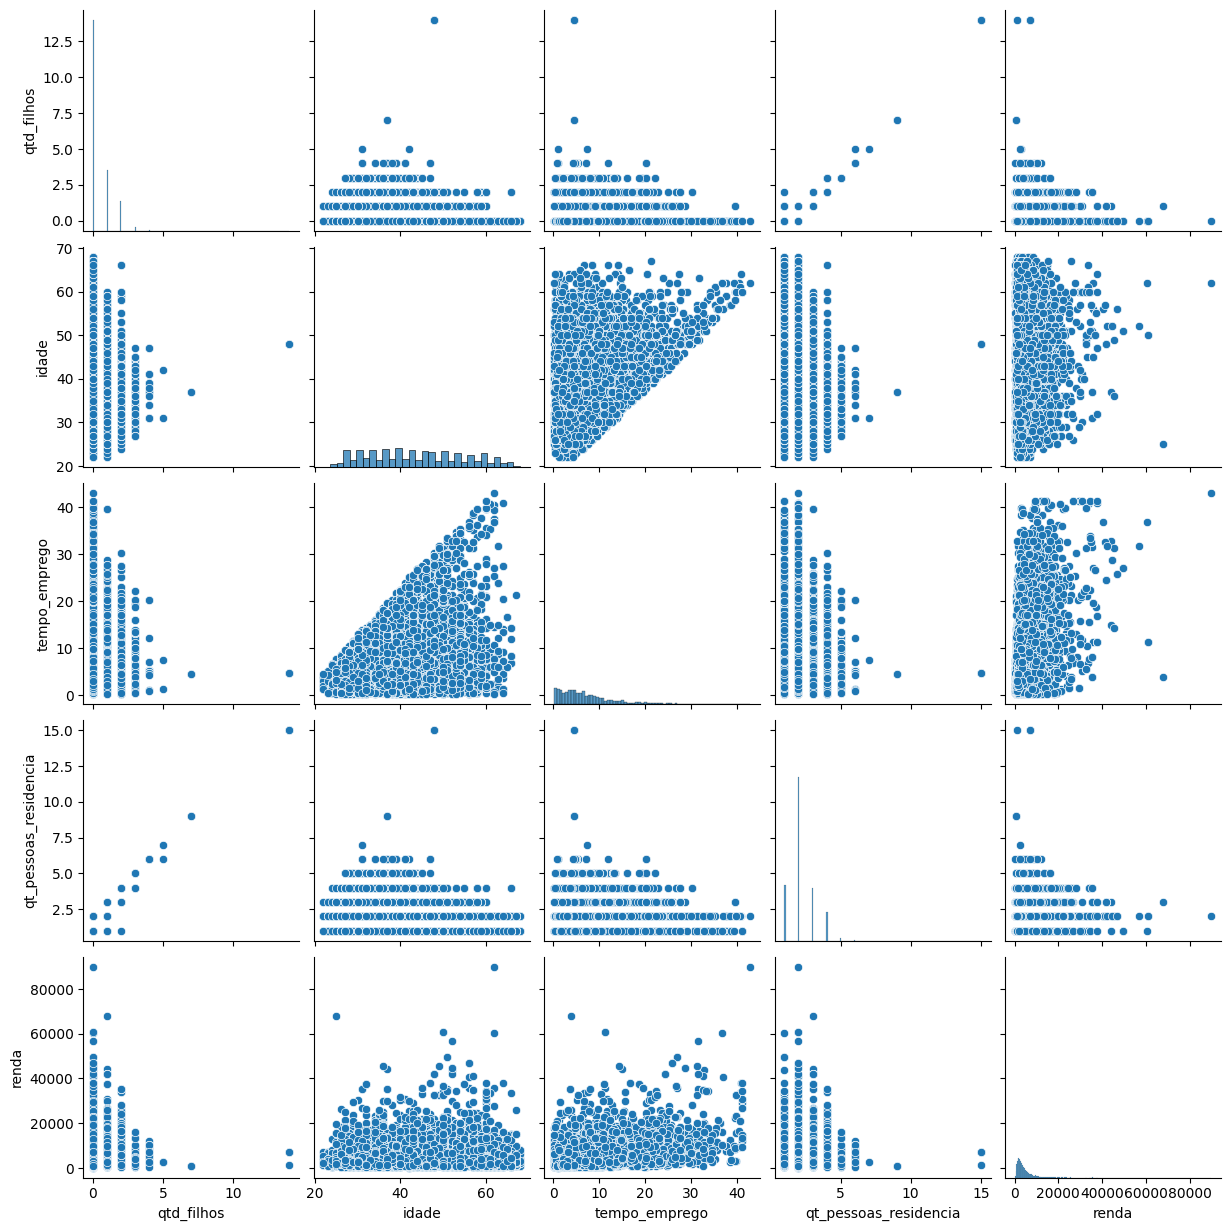

In [5]:
# Visualizando alguns gráficos para entender como as variáveis se comportam umas com as outras
sns.pairplot(df_numerico)

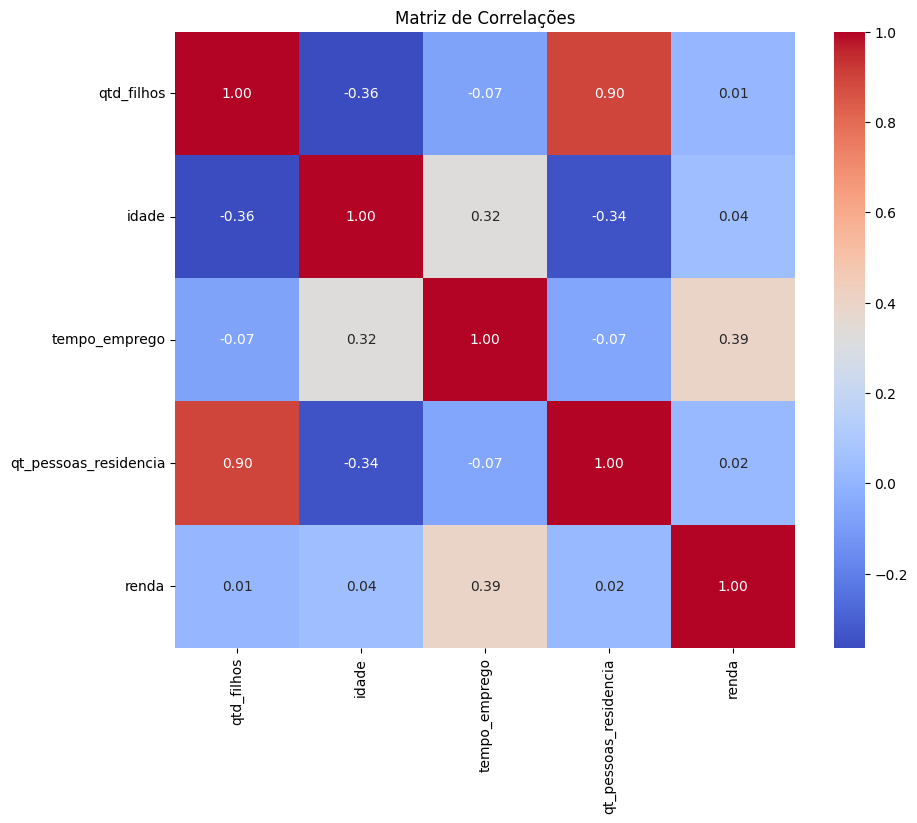

In [6]:
# Criando uma matriz de correlação por um mapa de calor
correlation_matrix = df_numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlações")
plt.show()

Existem vários padrões que fazem sentido nesta análise, sendo elas:
- A quantidade de filhos tem uma correlação forte com a quantidade de pessoas na casa
- O tempo de emprego tem uma boa correlação com a renda
- A renda não tem uma correlação forte com a quantidade de filhos, idade e quantidade de pessoas por residencia
- A quantidade de pessoas na residencia tem uma boa relação com a idade
- A idade tem uma boa correlação com a quantidade de filhos

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='renda', ylabel='tempo_emprego'>

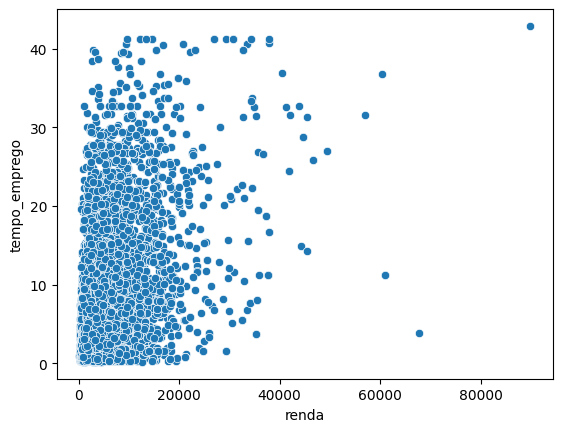

In [7]:
# Plotando o gráfico de variaveis númericas com maior correlação com renda; Renda x tempo_emprego
sns.scatterplot(df_numerico, x='renda', y='tempo_emprego')

<Axes: xlabel='renda', ylabel='idade'>

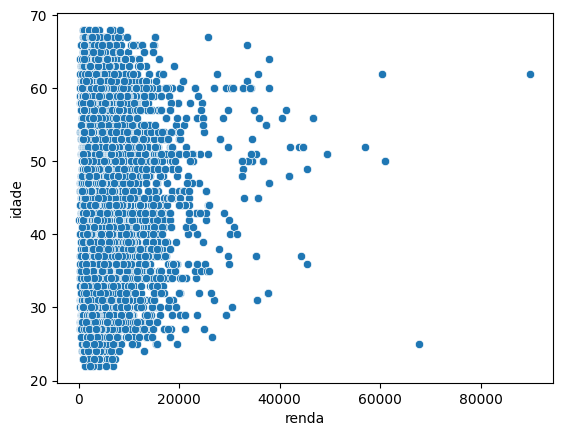

In [8]:
# Realizando a análise para a segunda variável mais correlacionada dentre as numéricas; renda x idade
sns.scatterplot(df_numerico, x='renda', y='idade')

In [9]:
# Convertendo a coluna 'educacao' para valores numéricos para verificar a correlação
df['educacao_numerica'] = df['educacao'].map({
    'Primário': 1,
    'Secundário': 2,
    'Superior incompleto': 3,
    'Superior completo': 4,
    'Pós graduação': 5
})

In [10]:
# Calculando a correlação entre as duas colunas; a correlação é muito baixa
correlacao = df['educacao_numerica'].corr(df['renda'])
correlacao

0.06545546657735078

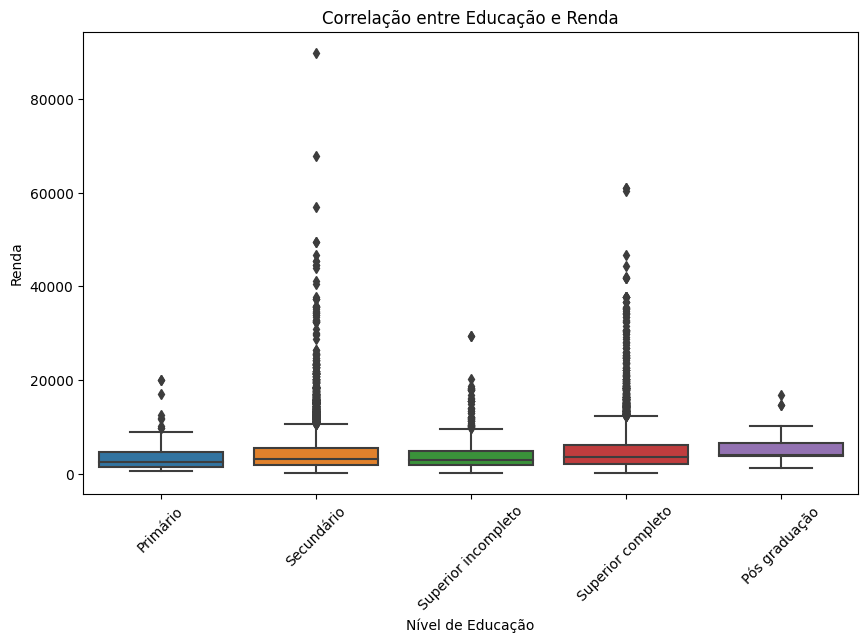

In [11]:
# Verificando a correlação entre renda e educação; Há muitos outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='educacao', y='renda', data=df, order=['Primário', 'Secundário', 'Superior incompleto', 'Superior completo', 'Pós graduação'])
plt.xticks(rotation=45)
plt.xlabel('Nível de Educação')
plt.ylabel('Renda')
plt.title('Correlação entre Educação e Renda')
plt.show()

3) Na sua opinião, há outliers na variável renda?

Após analisar os dados e gráficos gerados na questão anterior, podemos dizer que sim, existem outliers na variável renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='idade', ylabel='log_renda'>

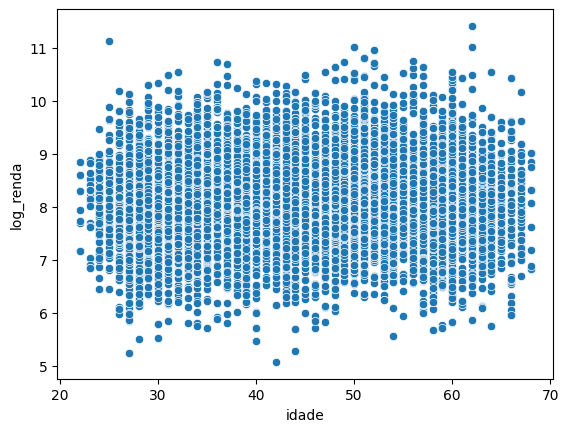

In [17]:
# analise de idade por log de renda
df_log = df.copy()
df_log['log_renda'] = np.log(df['renda'])

sns.scatterplot(x='idade', y='log_renda', data = df_log)

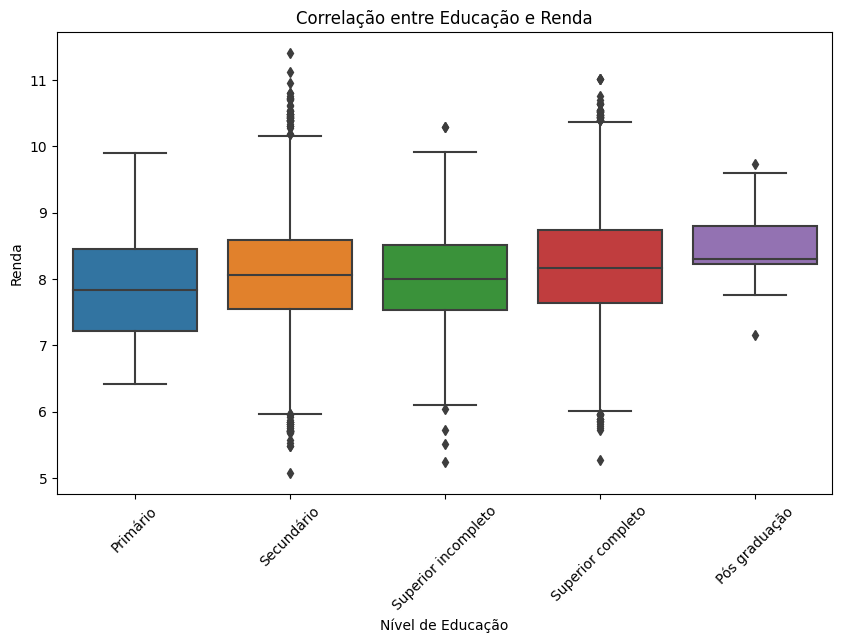

In [13]:
# Verificando a correlação entre renda e educação;
plt.figure(figsize=(10, 6))
sns.boxplot(x='educacao', y='log_renda', data=df_log, order=['Primário', 'Secundário', 'Superior incompleto', 'Superior completo', 'Pós graduação'])
plt.xticks(rotation=45)
plt.xlabel('Nível de Educação')
plt.ylabel('Renda')
plt.title('Correlação entre Educação e Renda')
plt.show()

<Axes: xlabel='log_renda', ylabel='tempo_emprego'>

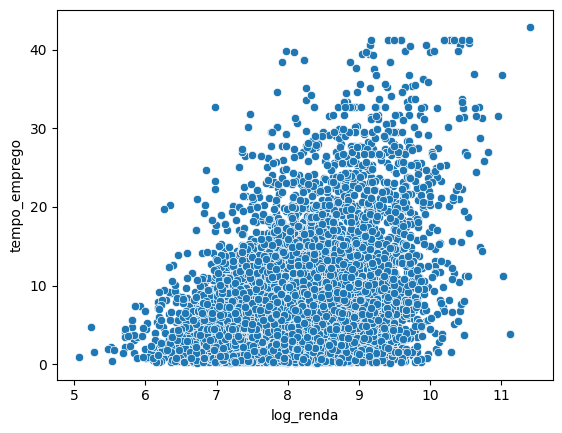

In [15]:
# tempo de emprego por log de renda
sns.scatterplot(df_log, x='log_renda', y='tempo_emprego')

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação da base log para a variável renda surtiu um efeito positivo, diminuindo a quantidade de outlaiers, porém, eles ainda existem. A análise que teve um efeito melhor foi a de educacao por renda